In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#there is no null values

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'general stistics')

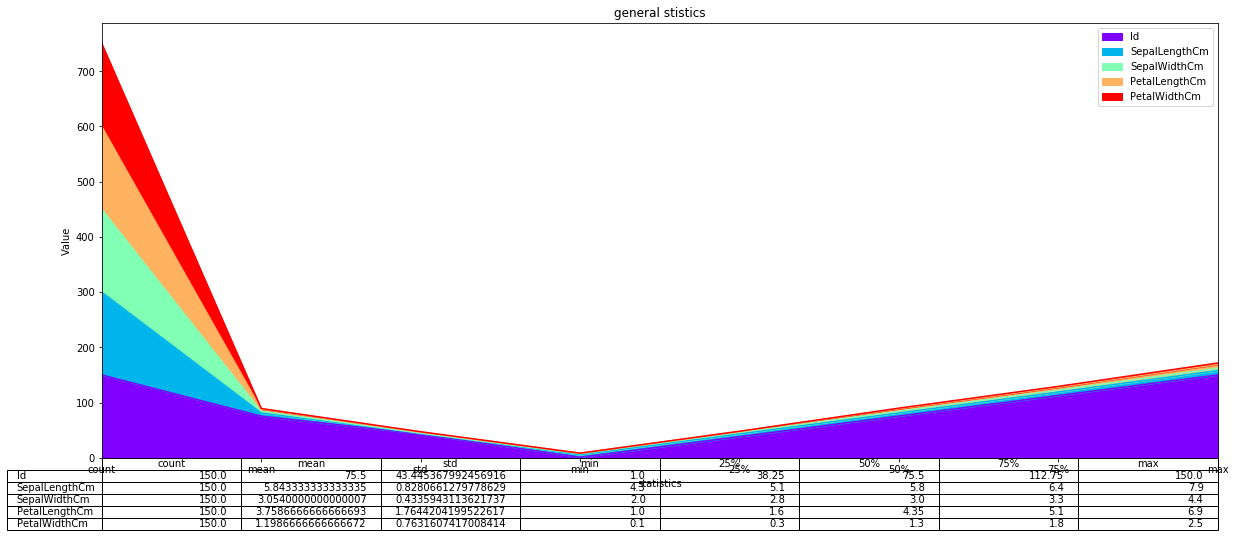

In [8]:
df.describe().plot(kind='area',fontsize=10,figsize=(20,8),table=True,colormap='rainbow')
plt.xlabel('statistics')
plt.ylabel('Value')
plt.title('general stistics')

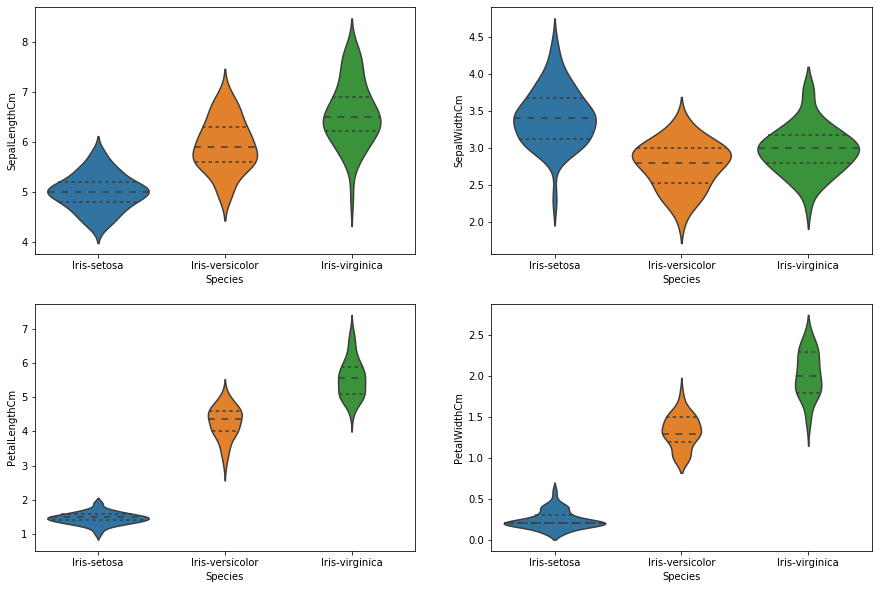

In [9]:
def plotvio(p,i):
    plt.subplot(2,2,i)
    g=sns.violinplot(y=p,x='Species',data=df,inner='quartile')
plt.figure(figsize=(15,10))
plotvio('SepalLengthCm',1)
plotvio('SepalWidthCm',2)
plotvio('PetalLengthCm',3)
plotvio('PetalWidthCm',4)

In [10]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
#removing the id column:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


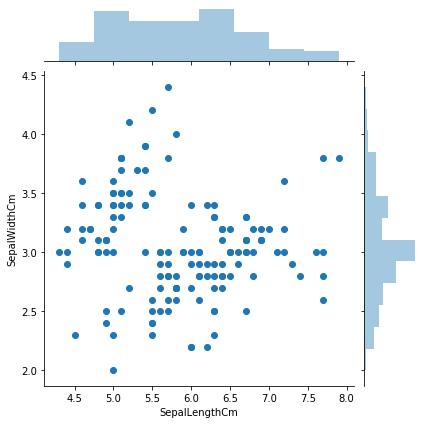

In [12]:
#joint plot: Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=df)

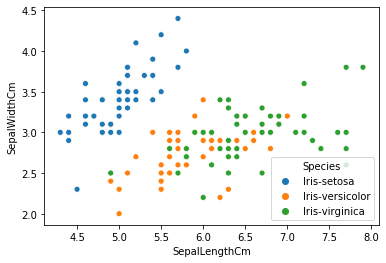

In [13]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)

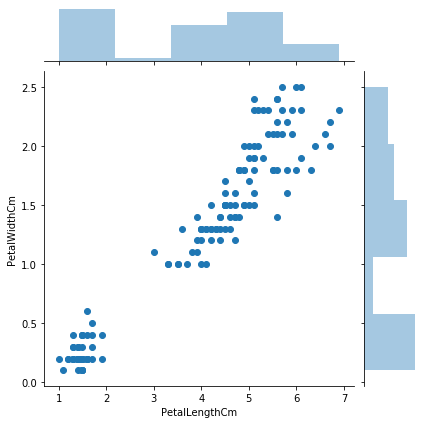

In [14]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=df)

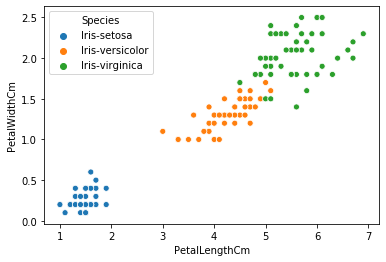

In [15]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df)

In [16]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


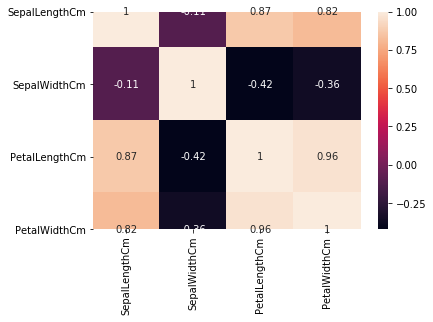

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
X=df.drop('Species',axis=1)
y=df['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
x=sc.transform(X)

In [20]:
x=pd.DataFrame(x,columns=X.columns)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [21]:
from sklearn.model_selection import train_test_split as t
xtrain,xtest,ytrain,ytest=t(x,y,test_size=0.3,random_state=1)

In [22]:
print(xtrain.shape)
print(xtest.shape)

(105, 4)
(45, 4)


In [23]:
xtrain.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,2.249683,-1.050569,1.786341,1.447956
18,-0.173674,1.726266,-1.170675,-1.181504
4,-1.021849,1.263460,-1.341272,-1.312977
45,-1.264185,-0.124958,-1.341272,-1.181504
59,-0.779513,-0.819166,0.080370,0.264699


In [24]:
#logistic regression:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)
from sklearn.metrics import accuracy_score
print('training accuracy: ',lg.score(xtrain,ytrain))
print('testing accuracy: ',lg.score(xtest,ytest))
print('accuracy score: ',accuracy_score(ytest,ypred))




training accuracy:  0.9142857142857143
testing accuracy:  0.8222222222222222
accuracy score:  0.8222222222222222


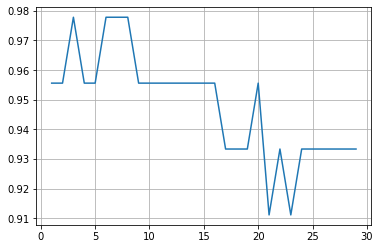

In [25]:
#k nearest neighbours:
from sklearn.neighbors import KNeighborsClassifier
N=[]
A=[]
for i in range(1,30):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(xtrain,ytrain)
    ypred=k.predict(xtest)
    A.append(accuracy_score(ytest,ypred))
    N.append(i)
plt.grid(True)
plt.plot(N,A)
plt.xlabel='no of neighbors'
plt.ylabel='accuracy score'
plt.show()    
    

In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print('the accuracy of trainset is:',knn.score(xtrain,ytrain))
print('the accuracy of testset is: ',knn.score(xtest,ytest))

the accuracy of trainset is: 0.9619047619047619
the accuracy of testset is:  0.9777777777777777


In [27]:
#support vector machine:
from sklearn.svm import SVC as svc
svm=svc(gamma='scale')
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print('training accuracy: ',svm.score(xtrain,ytrain))
print('testing accuracy: ',svm.score(xtest,ytest))

training accuracy:  0.9809523809523809
testing accuracy:  0.9555555555555556


In [28]:
from sklearn.tree import DecisionTreeClassifier as dt
dt=dt()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print('training accuracy: ',dt.score(xtrain,ytrain))
print('testing accuracy: ',dt.score(xtest,ytest))


training accuracy:  1.0
testing accuracy:  0.9555555555555556


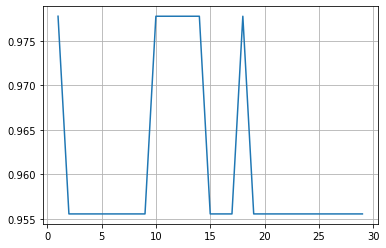

In [29]:
#random forest:
from sklearn.ensemble import RandomForestClassifier
N=[]
A=[]
for i in range(1,30):
    rf=RandomForestClassifier(n_estimators=i,random_state=51)
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    A.append(accuracy_score(ytest,ypred))
    N.append(i)
plt.grid(True)
plt.plot(N,A)

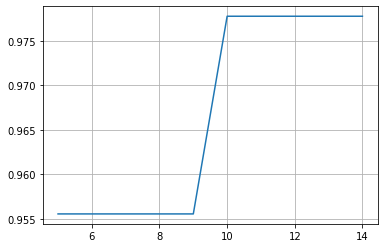

In [30]:
#random forest:
from sklearn.ensemble import RandomForestClassifier
N=[]
A=[]
for i in range(5,15):
    rf=RandomForestClassifier(n_estimators=i,random_state=51)
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    A.append(accuracy_score(ytest,ypred))
    N.append(i)
plt.grid(True)
plt.plot(N,A)

In [31]:
rf=RandomForestClassifier(n_estimators=10,random_state=51)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('the training accuracy is: ',rf.score(xtrain,ytrain))
print('the testing accuracy is: ',rf.score(xtest,ytest))


the training accuracy is:  0.9904761904761905
the testing accuracy is:  0.9777777777777777


In [32]:
#we know that petal length and width can be good features in identifying the species.
#let us take these features and build model around it.

In [56]:
m=df[['PetalLengthCm','PetalWidthCm']]
m.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [57]:
pet=x[['PetalLengthCm','PetalWidthCm']]
pet.head()

,PetalLengthCm,PetalWidthCm
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


In [35]:
x=pet
from sklearn.model_selection import train_test_split as t
xtrain,xtest,ytrain,ytest=t(x,y,test_size=0.3,random_state=1)

In [36]:
xtrain.head()

,PetalLengthCm,PetalWidthCm
118,1.786341,1.447956
18,-1.170675,-1.181504
4,-1.341272,-1.312977
45,-1.341272,-1.181504
59,0.080370,0.264699


In [38]:
#logistic regression:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)
from sklearn.metrics import accuracy_score
print('training accuracy: ',lg.score(xtrain,ytrain))
print('testing accuracy: ',lg.score(xtest,ytest))
print('accuracy score: ',accuracy_score(ytest,ypred))



training accuracy:  0.8952380952380953
testing accuracy:  0.8222222222222222
accuracy score:  0.8222222222222222


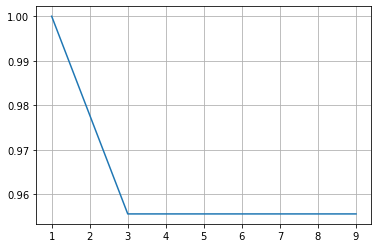

In [53]:
#k nearest neighbours:
from sklearn.neighbors import KNeighborsClassifier
N=[]
A=[]
for i in range(1,10):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(xtrain,ytrain)
    ypred=k.predict(xtest)
    A.append(accuracy_score(ytest,ypred))
    N.append(i)
plt.grid(True)
plt.plot(N,A)
plt.xlabel='no of neighbors'
plt.ylabel='accuracy score'
plt.show()    
    

In [54]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print('the accuracy of trainset is:',knn.score(xtrain,ytrain))
print('the accuracy of testset is: ',knn.score(xtest,ytest))

the accuracy of trainset is: 0.9904761904761905
the accuracy of testset is:  1.0


In [42]:
#support vector machine:
from sklearn.svm import SVC as svc
svm=svc(gamma='scale')
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print('training accuracy: ',svm.score(xtrain,ytrain))
print('testing accuracy: ',svm.score(xtest,ytest))

training accuracy:  0.9523809523809523
testing accuracy:  0.9555555555555556


In [43]:
from sklearn.tree import DecisionTreeClassifier as dt
dt=dt()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print('training accuracy: ',dt.score(xtrain,ytrain))
print('testing accuracy: ',dt.score(xtest,ytest))


training accuracy:  0.9904761904761905
testing accuracy:  0.9555555555555556


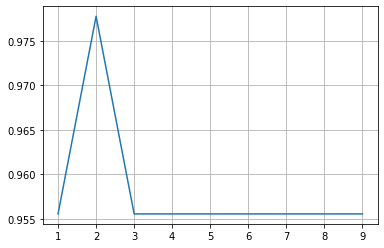

In [44]:
#random forest:
from sklearn.ensemble import RandomForestClassifier
N=[]
A=[]
for i in range(1,10):
    rf=RandomForestClassifier(n_estimators=i,random_state=11)
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    A.append(accuracy_score(ytest,ypred))
    N.append(i)
plt.grid(True)
plt.plot(N,A)

In [45]:
rf=RandomForestClassifier(n_estimators=2,random_state=11)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('the training accuracy is: ',rf.score(xtrain,ytrain))
print('the testing accuracy is: ',rf.score(xtest,ytest))


the training accuracy is:  0.9523809523809523
the testing accuracy is:  0.9777777777777777


In [52]:
#the random forest classifier has the highest accuracy of 100%.